# scikit-learn 基础使用_KNN 近邻分类

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # 用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签。


%matplotlib inline

## 水果识别

### 1、数据加载

In [32]:
input_file = './fruit_data_with_colors.txt'
data = pd.read_table(input_file)  # txt 文件，所以使用 pd.read_table()
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [33]:
print('样本个数：', len(data))

样本个数： 59


In [34]:
# 创建目标标签和名称的字典
label_name_dict = dict(zip(data['fruit_label'], data['fruit_name']))
label_name_dict

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [35]:
# 划分数据集
X = data[['mass', 'width', 'height', 'color_score']]  # X 是维度
y = data['fruit_label']  # y 是标准标签

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)  # random_state=0 的作用是使每次划分的测试样本（X_test）都相同，保证实验可以复现。

print('样本总数：{}，训练样本：{}，测试样本：{}'.format(len(data), len(X_train), len(X_test)))

样本总数：59，训练样本：44，测试样本：15


### 2、可视化特征变量

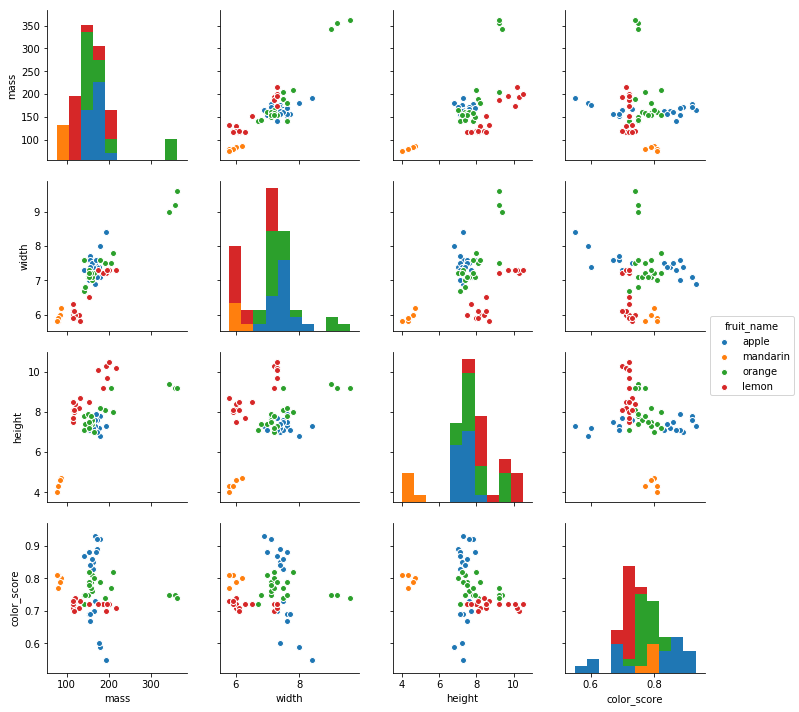

In [36]:
# 查看数据集
sns.pairplot(data=data, hue='fruit_name', vars=['mass', 'width', 'height', 'color_score'])

<IPython.core.display.Javascript object>


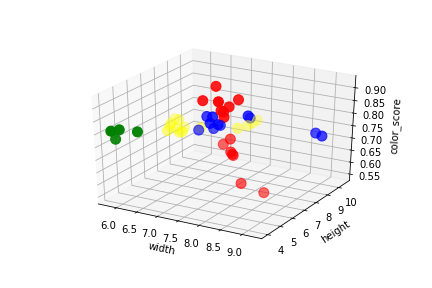

In [37]:
# 绘制三维图形（比较少用，最常用的还是上面的平面图）
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

label_color_dict = {1 : 'red', 2 : 'green', 3 : 'blue', 4 : 'yellow'}
colors = list(map(lambda label: label_color_dict[label], y_train))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### 3、选择、建立模型

In [38]:
from sklearn.neighbors import KNeighborsClassifier  # K 近邻分类（KNN）

# 建立 KNN 模型
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 即 K 为 5，也就是比较临近的 5 个元素

### 4、训练模型

In [40]:
knn.fit(X_train, y_train)  # 传入训练用的 X 和 y

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 5、测试模型

In [42]:
y_pred = knn.predict(X_test)  # 传入测试用的 X，看看计算出什么样的 y
print(y_pred)

[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]


In [43]:
# 查看正确率
from sklearn.metrics import accuracy_score  # 引入 sklearn 自带的计算正确率的包

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('准确率：', acc)

准确率： 0.5333333333333333


In [44]:
# 也可以训练模型之后，直接出正确率
knn.score(X_test, y_test)

0.5333333333333333

### 6、试一试不同 K 值对结果的影响

<IPython.core.display.Javascript object>


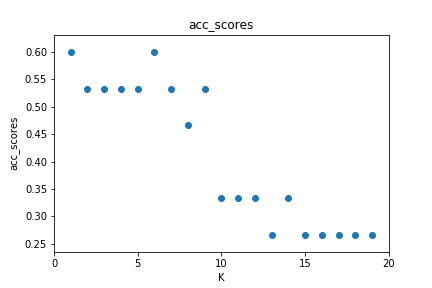

([<matplotlib.axis.XTick at 0x24c0e6ee9e8>,
 <a list of 5 Text xticklabel objects>)

In [48]:
k_range = range(1, 20)  # 不同的 k 值
acc_scores = []  # 存放每次的准确率

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  # 建立模型
    knn.fit(X_train, y_train)  # 训练模型
    y_pred = knn.score(X_test, y_test)  # 模型正确率
    acc_scores.append(y_pred)
    
# 可视化正确率
plt.figure()
plt.scatter(x=k_range, y=acc_scores)  # 绘制散点图
plt.title('acc_scores')
plt.xlabel('K')
plt.ylabel('acc_scores')
plt.xticks([0, 5, 10, 15, 20])